# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Load Data

In [6]:
df = pd.read_csv("Dataset/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Missing Value

Text(0.5, 1.0, 'Ratio of missing values per columns')

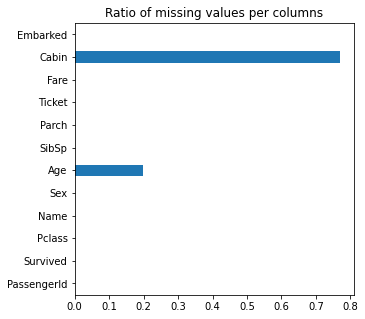

In [ ]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Text(0.5, 1.0, 'Ratio of missing values per columns')

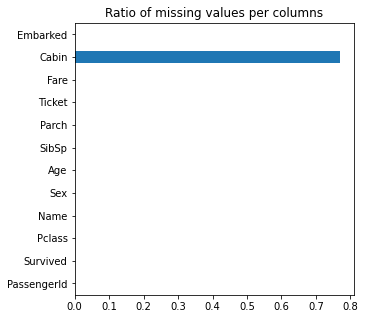

In [ ]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [ ]:
df = df.drop(columns='Cabin')

Text(0.5, 1.0, 'Ratio of missing values per columns')

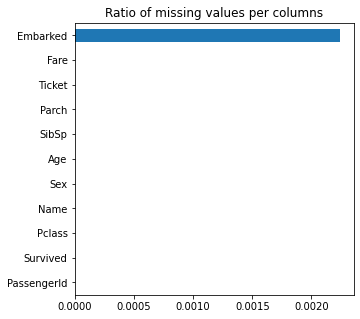

In [ ]:
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [ ]:
df = df.dropna()

# EDA

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=[object])

,Name,Sex,Ticket,Embarked
count,889,889,889,889
unique,889,2,680,3
top,"Najib, Miss. Adele Kiamie ""Jane""",male,CA. 2343,S
freq,1,577,7,644


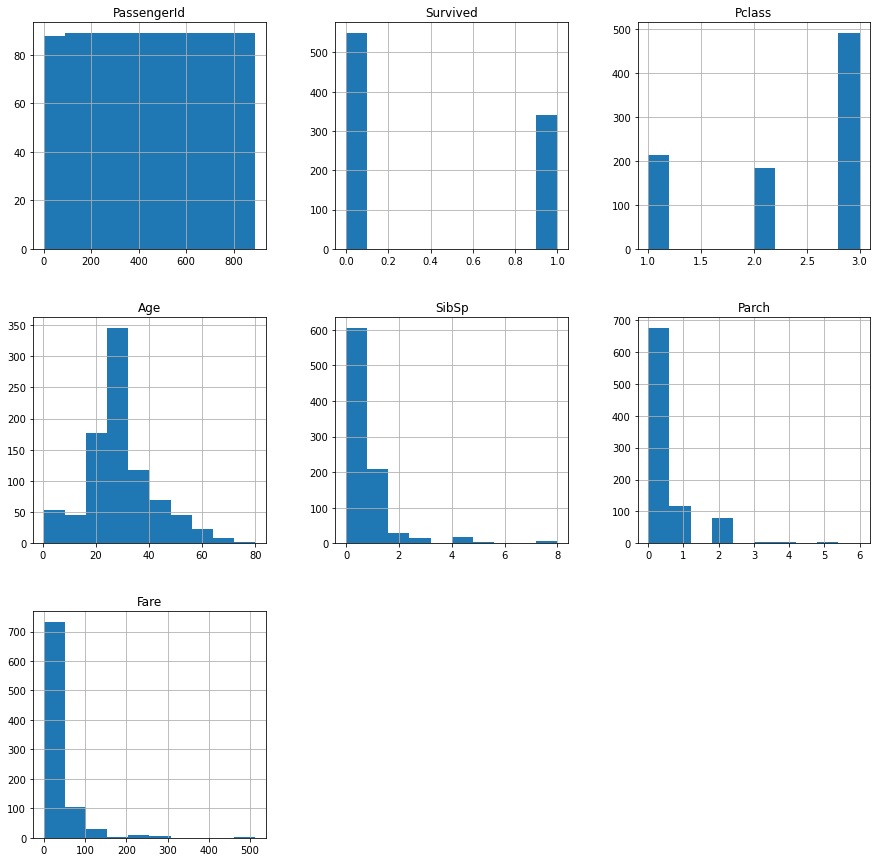

In [ ]:
df.hist(figsize = (15,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


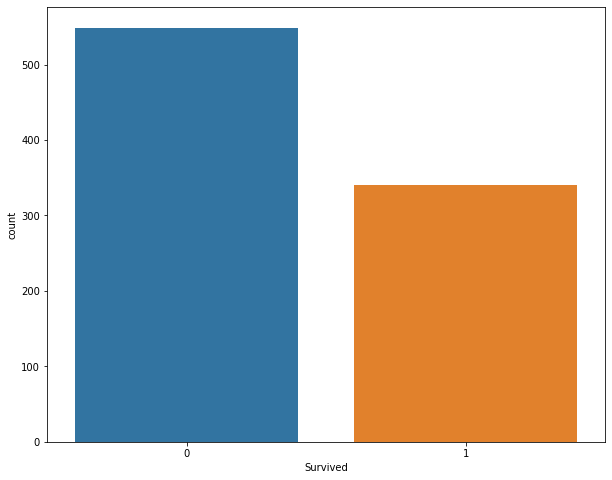

In [ ]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(df.Survived)

# Data Preprocessing

## Imbalanced Data

In [ ]:
count_class_0, count_class_1 = df.Survived.value_counts()

# Divide by class
df_class_0 = df[df['Survived'] == 0]
df_class_1 = df[df['Survived'] == 1]

Random over-sampling:
1    549
0    549
Name: Survived, dtype: int64


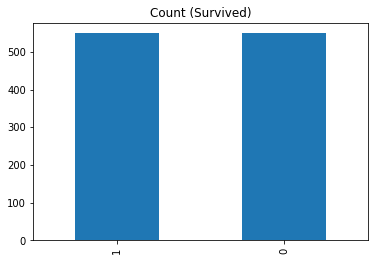

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Survived.value_counts())

df_test_over.Survived.value_counts().plot(kind='bar', title='Count (Survived)');

In [ ]:
df_test_over

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S


In [ ]:
df_final = df_test_over.drop(['PassengerId','Ticket','Name'],axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...
472,1,2,female,33.0,1,2,27.7500,S
204,1,3,male,18.0,0,0,8.0500,S
744,1,3,male,31.0,0,0,7.9250,S
68,1,3,female,17.0,4,2,7.9250,S


In [ ]:
df_final = pd.get_dummies(df_final,columns=['Pclass','Sex','Embarked'])
df_final

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,28.0,0,0,8.4583,0,0,1,0,1,0,1,0
6,0,54.0,0,0,51.8625,1,0,0,0,1,0,0,1
7,0,2.0,3,1,21.0750,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1,33.0,1,2,27.7500,0,1,0,1,0,0,0,1
204,1,18.0,0,0,8.0500,0,0,1,0,1,0,0,1
744,1,31.0,0,0,7.9250,0,0,1,0,1,0,0,1
68,1,17.0,4,2,7.9250,0,0,1,1,0,0,0,1


In [ ]:
df_final.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
X = df_final.drop(columns='Survived')
y = df_final['Survived']

# Modelling

## Random Forest

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model

In [ ]:
rf = RandomForestClassifier(criterion='gini', 
                            n_estimators=1000,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred = rf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, Y_pred))
cm = np.array(confusion_matrix(y_test, Y_pred))
print("===CONFUSION MATRIX")
print(cm)

Accuracy 0.8545454545454545
===CONFUSION MATRIX
[[149  27]
 [ 21 133]]


Optimal number of features : 5
Best features : Index(['Age', 'Fare', 'Pclass_3', 'Sex_female', 'Sex_male'], dtype='object')


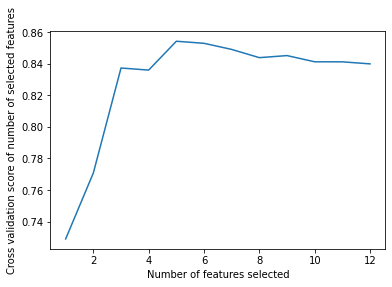

In [ ]:
rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
X1 = df_final[['Age', 'Fare', 'Pclass_3', 'Sex_female', 'Sex_male']]
y1 = df_final['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [ ]:
rf = RandomForestClassifier(criterion='gini',
                            random_state=0, 
                            n_estimators=1000,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred = rf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, Y_pred))
cm = np.array(confusion_matrix(y_test, Y_pred))
print("===CONFUSION MATRIX")
print(cm)

Accuracy 0.8690909090909091
===CONFUSION MATRIX
[[104  18]
 [ 18 135]]


### Prediction

In [7]:
test = pd.read_csv("Dataset/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = test.drop(['Name','Ticket','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [ ]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked'])
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,NaN,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
scaler = StandardScaler()
lst = ['Age', 'SibSp', 'Parch', 'Fare']
for i in lst:
  test[i] = scaler.fit_transform(np.array(test[i]).reshape(-1,1))
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.386231,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,1,0
1,893,1.371370,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,0,1
2,894,2.553537,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,1,0
3,895,-0.204852,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,0,1
4,896,-0.598908,0.616992,0.619896,-0.418471,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1
414,1306,0.740881,-0.499470,-0.400248,1.313753,1,0,0,1,0,1,0,0
415,1307,0.701476,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,0,1
416,1308,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1


In [ ]:
pred = test.drop(columns='PassengerId')
final = pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = gbrt.predict(pred)
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final.to_csv('submission.csv', index=False)

## XGboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01,n_estimators=5000)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.966
Accuracy on test set: 0.865


### Prediction

In [ ]:
test = pd.read_csv("Dataset/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = test.drop(['Name','Ticket','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [ ]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked'])
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,NaN,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
scaler = StandardScaler()
lst = ['Age', 'SibSp', 'Parch', 'Fare']
for i in lst:
  test[i] = scaler.fit_transform(np.array(test[i]).reshape(-1,1))
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.386231,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,1,0
1,893,1.371370,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,0,1
2,894,2.553537,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,1,0
3,895,-0.204852,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,0,1
4,896,-0.598908,0.616992,0.619896,-0.418471,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1
414,1306,0.740881,-0.499470,-0.400248,1.313753,1,0,0,1,0,1,0,0
415,1307,0.701476,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,0,1
416,1308,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1


In [ ]:
pred = test.drop(columns='PassengerId')
final = pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = gbrt.predict(pred)
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
final.to_csv('submission.csv', index=False)

## Neural Network

In [ ]:
scaler = StandardScaler()
lst = ['Age', 'SibSp', 'Parch', 'Fare']
for i in lst:
  df_final[i] = scaler.fit_transform(np.array(df_final[i]).reshape(-1,1))
df_final

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.550428,0.457096,-0.500217,-0.505672,0,0,1,0,1,0,0,1
4,0,0.466359,-0.497070,-0.500217,-0.491828,0,0,1,0,1,0,0,1
5,0,-0.081141,-0.497070,-0.500217,-0.484762,0,0,1,0,1,0,1,0
6,0,1.952432,-0.497070,-0.500217,0.266357,1,0,0,0,1,0,0,1
7,0,-2.114715,2.365430,0.745221,-0.266427,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1,0.309930,0.457096,1.990660,-0.150915,0,1,0,1,0,0,0,1
204,1,-0.863285,-0.497070,-0.500217,-0.491828,0,0,1,0,1,0,0,1
744,1,0.153502,-0.497070,-0.500217,-0.493991,0,0,1,0,1,0,0,1
68,1,-0.941499,3.319596,1.990660,-0.493991,0,0,1,1,0,0,0,1


In [ ]:
X = df_final.drop(columns='Survived')
y = df_final['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [ ]:
model = models.Sequential()
model.add(Dense(32, input_shape=(12,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
#choose optimizer and loss function
model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

#train
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=1000, batch_size=10,verbose=2)

Epoch 1/1000
77/77 - 1s - loss: 0.5084 - accuracy: 0.7852 - val_loss: 0.4665 - val_accuracy: 0.8212
Epoch 2/1000
77/77 - 0s - loss: 0.4869 - accuracy: 0.7891 - val_loss: 0.4524 - val_accuracy: 0.8212
Epoch 3/1000
77/77 - 0s - loss: 0.4725 - accuracy: 0.7878 - val_loss: 0.4400 - val_accuracy: 0.8212
Epoch 4/1000
77/77 - 0s - loss: 0.4629 - accuracy: 0.7891 - val_loss: 0.4338 - val_accuracy: 0.8152
Epoch 5/1000
77/77 - 0s - loss: 0.4548 - accuracy: 0.7956 - val_loss: 0.4278 - val_accuracy: 0.8182
Epoch 6/1000
77/77 - 0s - loss: 0.4494 - accuracy: 0.7943 - val_loss: 0.4259 - val_accuracy: 0.8152
Epoch 7/1000
77/77 - 0s - loss: 0.4441 - accuracy: 0.7943 - val_loss: 0.4249 - val_accuracy: 0.8152
Epoch 8/1000
77/77 - 0s - loss: 0.4385 - accuracy: 0.7995 - val_loss: 0.4240 - val_accuracy: 0.8152
Epoch 9/1000
77/77 - 0s - loss: 0.4349 - accuracy: 0.8034 - val_loss: 0.4182 - val_accuracy: 0.8000
Epoch 10/1000
77/77 - 0s - loss: 0.4313 - accuracy: 0.8008 - val_loss: 0.4188 - val_accuracy: 0.8091

In [ ]:
score, acc = model.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

33/33 [==============================] - 0s 1ms/step - loss: 1.0115 - accuracy: 0.8364
Test score: 1.0114574432373047
Test accuracy: 0.8363636136054993


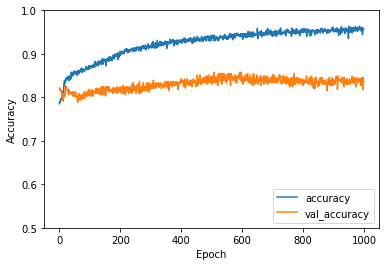

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

### Prediction

In [ ]:
test = pd.read_csv("Dataset/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = test.drop(['Name','Ticket','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [ ]:
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked'])
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,NaN,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
scaler = StandardScaler()
lst = ['Age', 'SibSp', 'Parch', 'Fare']
for i in lst:
  test[i] = scaler.fit_transform(np.array(test[i]).reshape(-1,1))
test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.386231,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,1,0
1,893,1.371370,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,0,1
2,894,2.553537,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,1,0
3,895,-0.204852,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,0,1
4,896,-0.598908,0.616992,0.619896,-0.418471,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1
414,1306,0.740881,-0.499470,-0.400248,1.313753,1,0,0,1,0,1,0,0
415,1307,0.701476,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,0,1
416,1308,-0.204852,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1


In [ ]:
pred = test.drop(columns='PassengerId')
final = pd.DataFrame()
final['PassengerId'] = test['PassengerId']
final['Survived'] = model.predict_classes(pred)
final

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [ ]:
final.to_csv('submission(nn).csv', index=False)